# Data Generation
We generate a dataset from 18 unique multivariate Nonlinear Autoregressive (NAR) processes `processes_to_use` (see image below). <br>
Each time series consists of 250 timesteps `observations_per_time_series` to create a finite-sample size scenario. <br>
We set the (gaussian) noise standard deviation at 0.01 `noise_std`. <br>
In our generative processes, a variable is influenced by a collection of other variables (parents) that we refer to as \textit{neighborhood} $\mathcal{N}_j$. <br>
The size of the neighborhood $\eta$ is randomly chosen from [1...$\eta_{max}$] `max_neighborhood_size` for each observation and kept constant for all the required timesteps. <br>
Each variable past value is assumed to always be part of its current value neighborhood. <br>
Remaining members of neighborhood are chosen randomly and kept fixed for the current time series. We set $\eta_{max}=2$. `max_neighborhood_size` <br><br>

For each of these parameters combination and each generative process, we generate $O=40$ different time series observations `time_series_per_process`. <br> 
We remark that each variable $n$ from each observation $o$ has a different neighborhood $\mathcal{N}_j$, ensuring variability within the generated time series. <br>
Each time series is designed to reveal dynamic dependencies and capture complex nonlinear relationships and lag structures. <br>
The initial state for each series is set by a uniform random distribution, with variable values ranging from -1 to 1. <br>
<br>

Stability checks are performed for the generated time series. `max_attempts` controls the maximum amount of generations attempts before performing the checks. 


`maxlags` does not impact the generation, since the max lags are 'hardcoded' in the generative processes. 
It is however passed to the function for the generation of the corresponding DAG objects. 

Cross-sectional and temporal series: $\mathcal{N}_j$ denotes the indices of the set of time series which are neighbors of the $j^{th}$ component. $\bar{y}_t\left[\mathcal{N}_j\right]$ stands for the average of the value of the neighboring series at time $t$. Generative processes 5 and 17 are not considered because of their instability with the adopted initial conditions.

\begin{align}
& Y_{t+1}\left[j\right]=-0.4 \frac{\left(3-\bar{Y}_t\left[\mathcal{N}_j\right]^2\right)}{\left(1+\bar{Y}_t\left[\mathcal{N}_j\right]^2\right)}+0.6 \frac{3-\left(\bar{Y}_{t-1}\left[\mathcal{N}_j\right]-0.5\right)^3}{1+\left(\bar{Y}_{t-1}\left[\mathcal{N}_j\right]-0.5\right)^4}+W_{t+1}\left[j\right]   \\ 
& Y_{t+1}\left[j\right]=\left(0.4-2 \cos \left(40 \bar{Y}_{t-2}\left[\mathcal{N}_j\right]\right) \exp \left(-30 \bar{Y}_{t-2}\left[\mathcal{N}_j\right]^2\right)\right) \bar{Y}_{t-2}\left[\mathcal{N}_j\right]+\left(0.5-0.5 \exp \left(-50 \bar{Y}_{t-1}\left[\mathcal{N}_j\right]^2\right)\right) \bar{Y}_{t-1}\left[\mathcal{N}_j\right]+W_{t+1}\left[j\right]  \\ 
& Y_{t+1}\left[j\right]=1.5 \sin \left(\pi / 2 \bar{Y}_{t-1}\left[\mathcal{N}_j\right]\right)-\sin \left(\pi / 2 \bar{Y}_{t-2}\left[\mathcal{N}_j\right]\right)+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=2 \exp \left(-0.1 \bar{Y}_t\left[\mathcal{N}_j\right]^2\right) \bar{Y}_t\left[\mathcal{N}_j\right]-\exp \left(-0.1 \bar{Y}_{t-1}\left[\mathcal{N}_j\right]^2\right) \bar{Y}_{t-1}\left[\mathcal{N}_j\right]+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=-2 \bar{Y}_t\left[\mathcal{N}_j\right] I\left(\bar{Y}_t\left[\mathcal{N}_j\right]<0\right)+0.4 \bar{Y}_t\left[\mathcal{N}_j\right] I\left(\bar{Y}_t\left[\mathcal{N}_j\right]<0\right)+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=0.8 \log \left(1+3 \bar{Y}_t\left[\mathcal{N}_j\right]^2\right)-0.6 \log \left(1+3 \bar{Y}_{t-2}\left[\mathcal{N}_j\right]^2\right)+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=\left(0.4-2 \cos \left(40 \bar{Y}_{t-2}\left[\mathcal{N}_j\right]\right) \exp \left(-30 \bar{Y}_{t-2}\left[\mathcal{N}_j\right]^2\right)\right) \bar{Y}_{t-2}\left[\mathcal{N}_j\right]+\left(0.5-0.5 \exp \left(-50 \bar{Y}_{t-1}\left[\mathcal{N}_j\right]^2\right)\right) \bar{Y}_{t-1}\left[\mathcal{N}_j\right]+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=\left(0.5-1.1 \exp \left(-50 \bar{Y}_t\left[\mathcal{N}_j\right]^2\right)\right) \bar{Y}_t\left[\mathcal{N}_j\right]+\left(0.3-0.5 \exp \left(-50 \bar{Y}_{t-2}\left[\mathcal{N}_j\right]^2\right)\right) \bar{Y}_{t-2}\left[\mathcal{N}_j\right]+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=0.3 \bar{Y}_t\left[\mathcal{N}_j\right]+0.6 \bar{Y}_{t-1}\left[\mathcal{N}_j\right]+\frac{\left(0.1-0.9 \bar{Y}_t\left[\mathcal{N}_j\right]+0.8 \bar{Y}_{t-1}\left[\mathcal{N}_j\right]\right)}{\left(1+\exp \left(-10 \bar{Y}_t\left[\mathcal{N}_j\right]\right)\right)}+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=\operatorname{sign}\left(\bar{Y}_t\left[\mathcal{N}_j\right]\right)+W_{t+1}\left[j\right]  \\ 
& Y_{t+1}\left[j\right]=0.8 \bar{Y}_t\left[\mathcal{N}_j\right]-\frac{0.8 \bar{Y}_t\left[\mathcal{N}_j\right]}{\left(1+\exp \left(-10 \bar{Y}_t\left[\mathcal{N}_j\right]\right)\right)}+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=0.3 \bar{Y}_t\left[\mathcal{N}_j\right]+0.6 \bar{Y}_{t-1}\left[\mathcal{N}_j\right]+\frac{\left(0.1-0.9 \bar{Y}_t\left[\mathcal{N}_j\right]+0.8 \bar{Y}_{t-1}\left[\mathcal{N}_j\right]\right)}{\left(1+\exp \left(-10 \bar{Y}_t\left[\mathcal{N}_j\right]\right)\right)}+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=0.38 \bar{Y}_t\left[\mathcal{N}_j\right]\left(1-\bar{Y}_{t-1}\left[\mathcal{N}_j\right]\right)+W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right]=\left\{\begin{array}{l}-0.5 \bar{Y}_t\left[\mathcal{N}_j\right] \quad \text { if } \quad \bar{Y}_t\left[\mathcal{N}_j\right]<1 \\ 0.4 \bar{Y}_t\left[\mathcal{N}_j\right]\end{array}\right. \\ 
& Y_{t+1}\left[j\right]=\left\{\begin{array}{l}0.9 \bar{Y}_t\left[\mathcal{N}_j\right]+W_{t+1}\left[j\right] \text { if } \quad\left|\bar{Y}_t\left[\mathcal{N}_j\right]\right|<1 \\ -0.3 \bar{Y}_t\left[\mathcal{N}_j\right]+W_{t+1}\left[j\right]\end{array}\right. \\ 
& \begin{aligned} Y_{t+1}\left[j\right] & =\left\{\begin{array}{l}-0.5 \bar{Y}_t\left[\mathcal{N}_j\right]+W_{t+1}\left[j\right] \quad \text { if } \quad x_t=1 \\ 0.4 \bar{Y}_t\left[\mathcal{N}_j\right]+W_{t+1}\left[j\right]\end{array}\right. \\ x_{t+1} & =1-x_t, x_0=1\end{aligned} \\ 
& Y_{t+1}\left[j\right]=\sqrt{0.000019+0.846 *\left(\bar{Y}_t\left[\mathcal{N}_j\right]^2+0.3 \bar{Y}_{t-1}\left[\mathcal{N}_j\right]^2+0.2 \bar{Y}_{t-2}\left[\mathcal{N}_j\right]^2+0.1 \bar{Y}_{t-3}\left[\mathcal{N}_j\right]^2\right)} W_{t+1}\left[j\right]\\ 
& Y_{t+1}\left[j\right] = 0.9 \cdot \bar{Y}_t\left[\mathcal{N}_j\right] + W_{t+1}\left[j\right] \\ 
& Y_{t+1}\left[j\right] = 0.4 \cdot \bar{Y}_{t-1}\left[\mathcal{N}_j\right] + 0.6 \cdot \bar{Y}_{t-2}\left[\mathcal{N}_j\right] + W_{t+1}\left[j\right]\\ 
& Y_{t+1}\left[j\right] = 0.5 \cdot \bar{Y}_{t-3}\left[\mathcal{N}_j\right] + W_{t+1}\left[j\right]\\ 
\end{align}

In [1]:
from d2c.data_generation.builder import TSBuilder

In [2]:
N_VARS = 5
MAXLAGS = 3

In [3]:
tsbuilder = TSBuilder(observations_per_time_series=250, 
                              maxlags=MAXLAGS, 
                              n_variables=N_VARS, 
                              time_series_per_process=40, 
                              processes_to_use=[13,14], 
                              noise_std=0.1, 
                              max_neighborhood_size=2, 
                              seed=42, 
                              max_attempts=10,
                              verbose=True)

tsbuilder.build()

Generating data for process 13...
Generating data for process 14...


`tsbuilder` contains three attributes:
- `generated_observations`: A dictionary containing the generated observations.
- `generated_dags`: A dictionary containing the generated DAGs.
- `neighbors`: A dictionary containing the generated neighbors.

These attributes might be accessed with the corresponding methods: 

- `tsbuilder.get_generated_observations()`
- `tsbuilder.get_generated_dags()`
- `tsbuilder.get_neighbors()`

Each of these is a nested dictionary with \[generative_process\] and \[time_series_index\] keys.  <br>
So, if `processes_to_use=[13,14]` and `time_series_per_process=40` the outer dictionary will have two keys (13,14) and the inner dictionary will have 40 keys (0,...,39)






In [4]:
# we can check one of the generated time series
tsbuilder.get_generated_observations()[13][0]

array([[ 0.12572272,  0.19662052,  0.22587989, -0.22398384,  0.20737703],
       [-0.00134852,  0.01275251,  0.06918947, -0.33561031, -0.17130713],
       [-0.04560501, -0.1253232 ,  0.04204847, -0.24689942, -0.19282752],
       ...,
       [-0.02250109,  0.04263855, -0.04275641, -0.05926747, -0.00281437],
       [-0.13430916,  0.00977146, -0.08891246,  0.00441394, -0.15648334],
       [-0.01070794,  0.05603269, -0.24316952,  0.03918236,  0.06313588]])

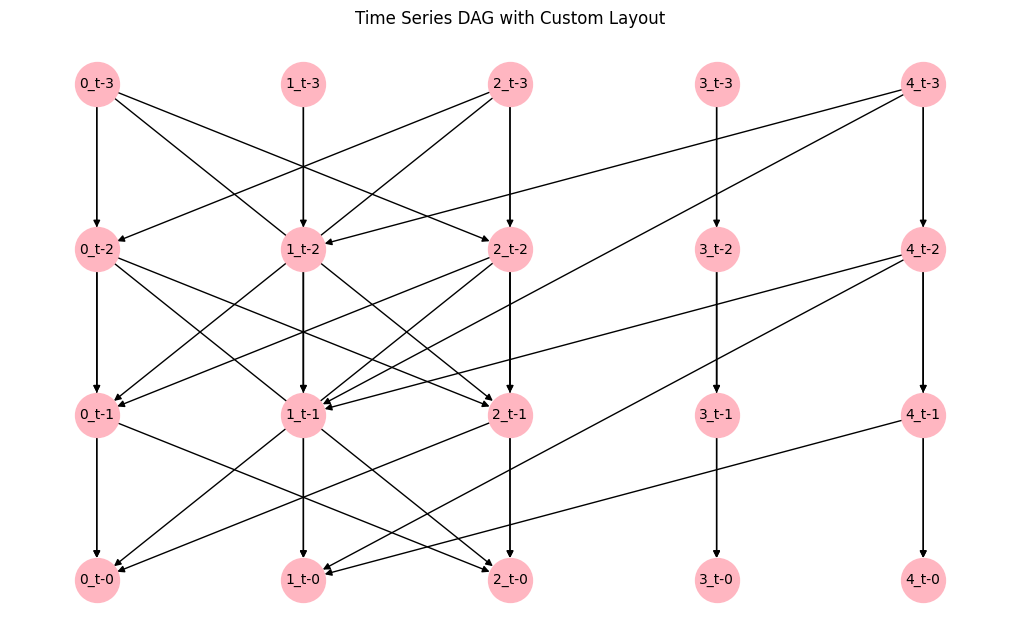

In [5]:
# we can check one of the generated dags
import networkx as nx
from d2c.data_generation.utils import show_DAG
dag = tsbuilder.get_generated_dags()[13][0]
show_DAG(dag, N_VARS, MAXLAGS)

In [6]:
# now we check the neighbors
neighbors = tsbuilder.get_generated_neighbors()
neighbors[13][0]

[array([0, 2]), array([1, 4]), array([2, 0]), [3], [4]]

We see that the neighbors are coherent with the DAG. We can now save the generated data to disk.

In [7]:
tsbuilder.to_pickle('example/synthetic_data_train.pkl')

We also produce a test set using another process. This will be used later.

In [8]:
tsbuilder = TSBuilder(observations_per_time_series=250, 
                              maxlags=MAXLAGS, 
                              n_variables=N_VARS, 
                              time_series_per_process=40, 
                              processes_to_use=[15], 
                              noise_std=0.1, 
                              max_neighborhood_size=2, 
                              seed=42, 
                              max_attempts=10,
                              verbose=True)

tsbuilder.build()

tsbuilder.to_pickle('example/synthetic_data_test.pkl')

Generating data for process 15...
